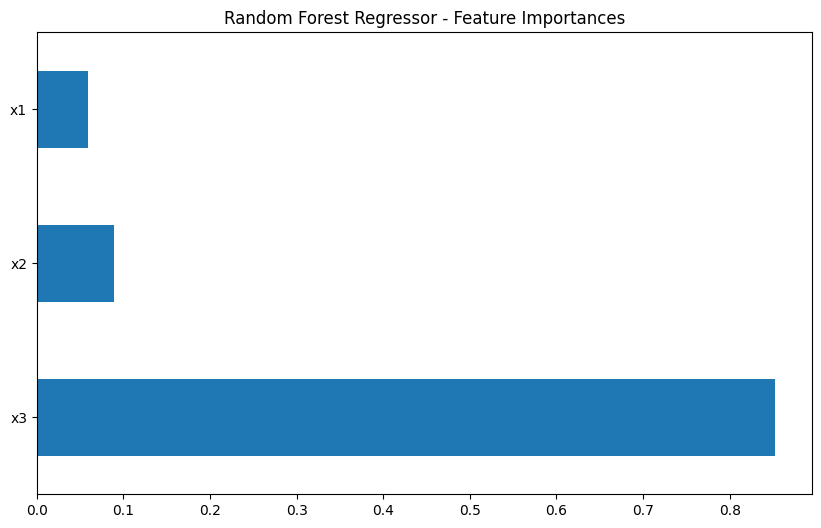

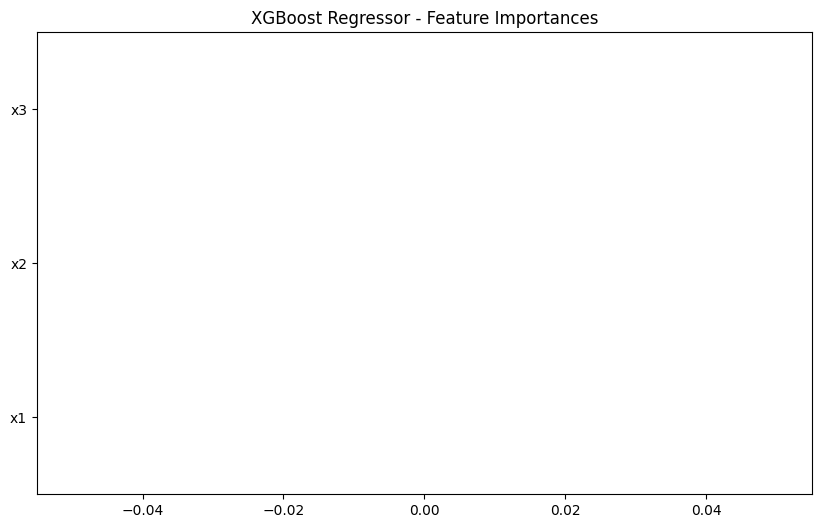

In [51]:
import numpy as np
from dython.nominal import associations  # correlation calculation

# Generate x1
x1 = np.random.choice([0, 1], size=1000, p=[0.5, 0.5])

# Generate x2
x2 = np.random.choice([0, 1, 2], size=1000, p=[0.475, 0.175, 0.35])

# Generate x3
x3_values = np.concatenate([
    np.random.normal(1, 1, size=500),
    np.random.normal(20, 2, size=500)
])
np.random.shuffle(x3_values)

# Assuming x3_values contains the values of x3 following the described distribution
x3 = x3_values[:1000]

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Your data generation code here...

# Create a DataFrame
data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3
})

# Splitting the data into features and target
X = data[['x1', 'x2', 'x3']]
y = np.random.rand(1000)  # Replace this with your actual target variable

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Fit Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Fit XGBoost Regressor model
xgboost = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100, random_state=42)
xgboost.fit(X_train, y_train)

# Plotting feature importances for Random Forest Regressor
plt.figure(figsize=(10, 6))
feat_importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances_rf.nlargest(10).plot(kind='barh')
plt.title('Random Forest Regressor - Feature Importances')
plt.show()

# Plotting feature importances for XGBoost Regressor
plt.figure(figsize=(10, 6))
feat_importances_xgb = pd.Series(xgboost.feature_importances_, index=X.columns)
feat_importances_xgb.plot(kind='barh')
plt.title('XGBoost Regressor - Feature Importances')
plt.show()


In [43]:
import numpy as np

# Generate x1
x1 = np.random.choice([0, 1], size=1000, p=[0.5, 0.5])

# Generate x2 based on x1 values
x2_values = []
for val in x1:
    if val == 0:
        x2_values.append(np.random.choice(['A', 'B', 'C'], p=[0.90, 0.10, 0.00]))
    else:
        x2_values.append(np.random.choice(['A', 'B', 'C'], p=[0.05, 0.25, 0.70]))

# Generate x3
x3_values = np.concatenate([
    np.random.normal(1, 1, size=500),
    np.random.normal(20, 2, size=500)
])
np.random.shuffle(x3_values)
x3 = x3_values[:1000]

# Create a DataFrame
import pandas as pd
data = pd.DataFrame({
    'x1': x1,
    'x2': x2_values,
    'x3': x3
})


In [46]:
import numpy as np
import pandas as pd

# Generate x1
x1 = np.random.choice([0, 1], size=1000, p=[0.5, 0.5])

# Generate x2
x2 = np.random.choice(['A', 'B', 'C'], size=1000, p=[0.475, 0.175, 0.35])

# Generate x3 based on x1 values
x3_0 = np.random.normal(1, 1, size=np.sum(x1 == 0))
x3_1 = np.random.normal(20, 2, size=np.sum(x1 == 1))

x3 = np.empty_like(x1, dtype=float)
x3[x1 == 0] = x3_0
x3[x1 == 1] = x3_1

# Create a DataFrame
data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3
})

In [20]:
# Creating subplots side by side
from sklearn.inspection import PartialDependenceDisplay


plt.figure(figsize=(10, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
ax = plt.subplot(1, 2, 1)  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(model, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=ax)

plt.legend()  # Show legend
plt.title('Tree based models')

NameError: name 'plt' is not defined

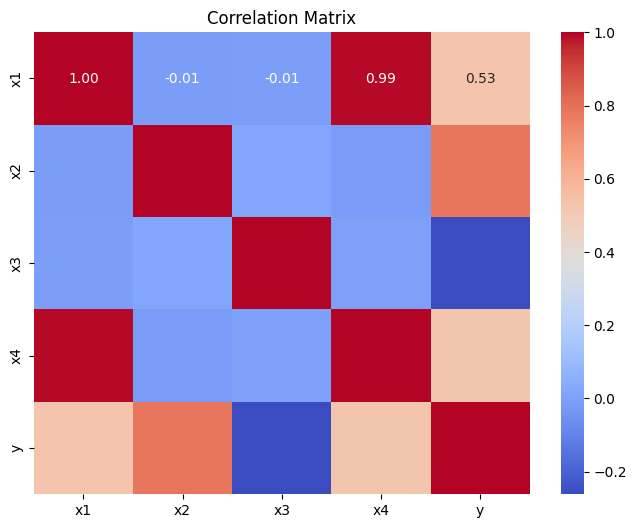

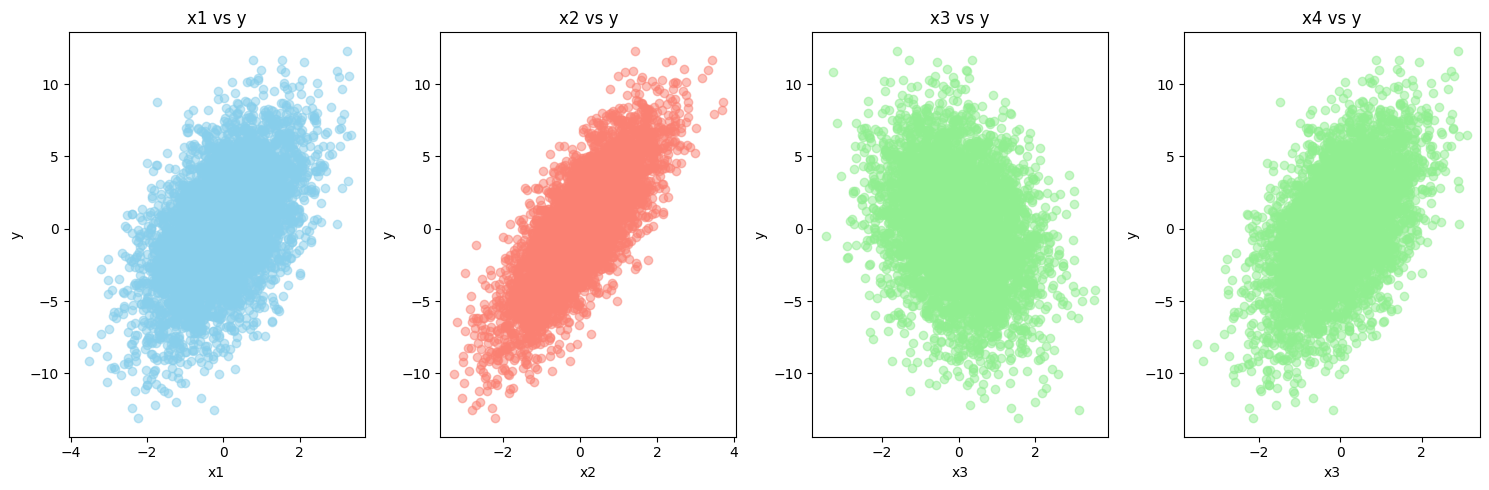

R-squared score: 0.9805
RMSE: 0.5186


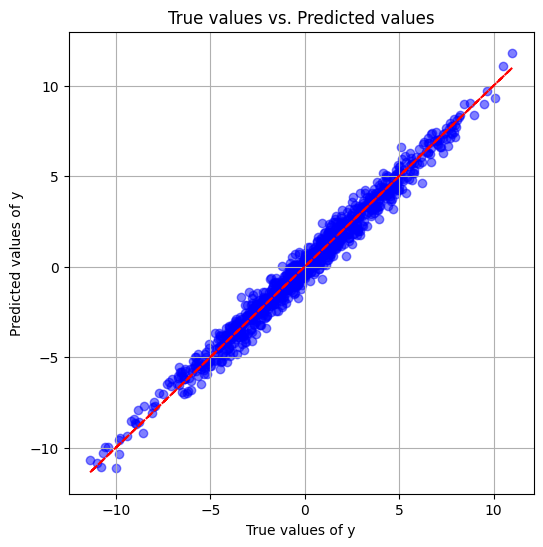

Text(0.5, 1.0, 'Tree based models')

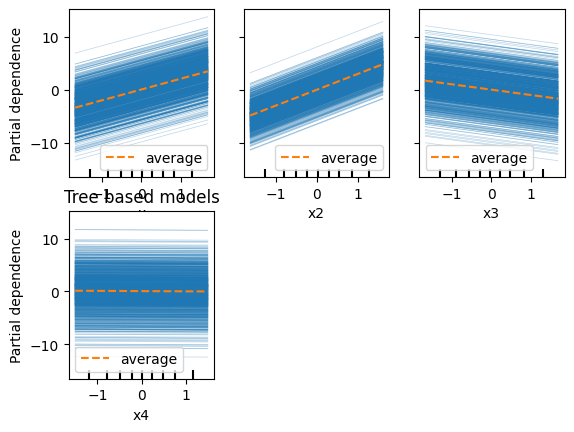

In [1]:

plt.figure(figsize=(10, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
ax = plt.subplot(1, 2, 1)  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(model, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=ax)

plt.legend()  # Show legend
plt.title('Tree based models')


NameError: name 'plt' is not defined

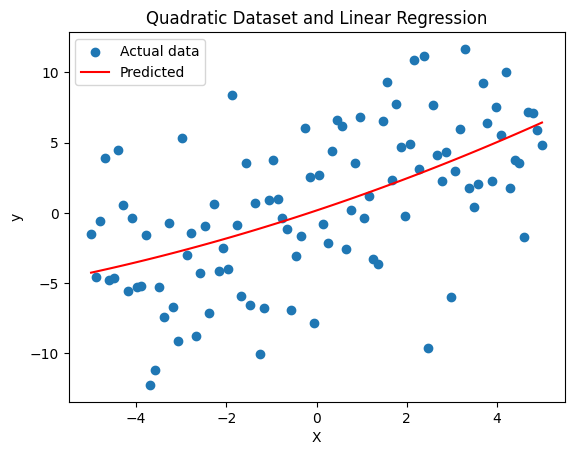

Coefficients: [[1.06896634 0.03665116]]
Intercept: [0.16917081]


In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generating quadratic dataset
np.random.seed(42)
X = np.linspace(-5, 5, 100)[:, np.newaxis]
y = X + 1 + np.random.randn(100, 1) * 5  # Quadratic equation with noise

# Creating polynomial features for quadratic regression
X_quad = np.hstack((X, X**2))

# Perform linear regression
model = LinearRegression()
model.fit(X_quad, y)

# Predictions
y_pred = model.predict(X_quad)

# Plotting the results
plt.scatter(X, y, label='Actual data')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Quadratic Dataset and Linear Regression')
plt.show()

# Coefficients and intercept of the linear regression model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


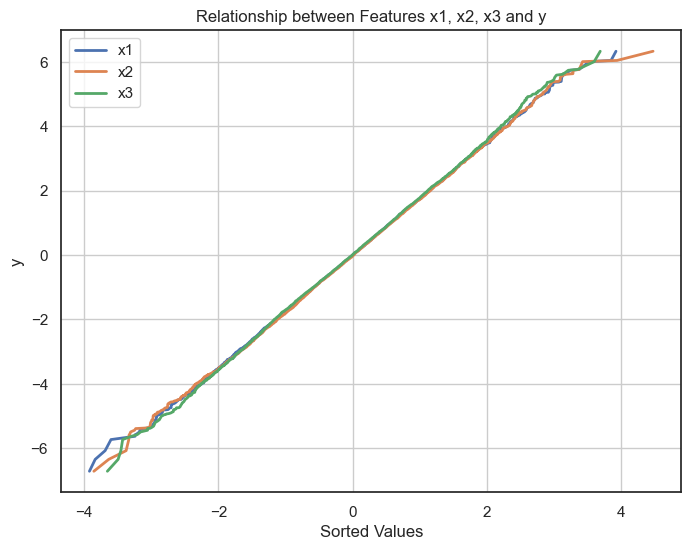

Coefficients: [1. 1. 1.]
Intercept: 1.951563910473908e-18
Correlation coefficient between x1 and x2: -0.008553439863046013
Correlation coefficient between x1 and x3: 0.026724249261299682
Correlation coefficient between x2 and x3: 0.026810368420372183


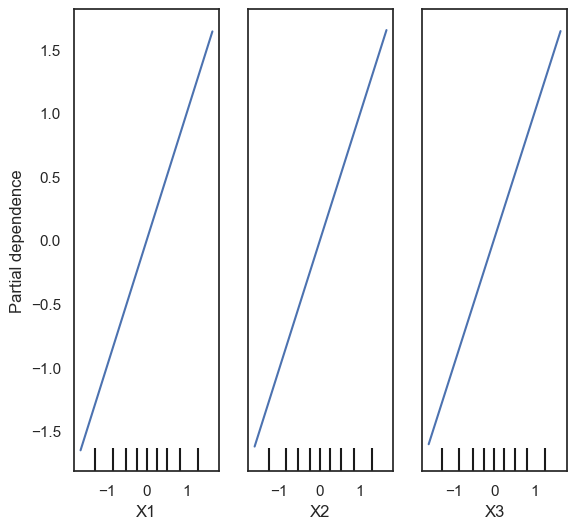

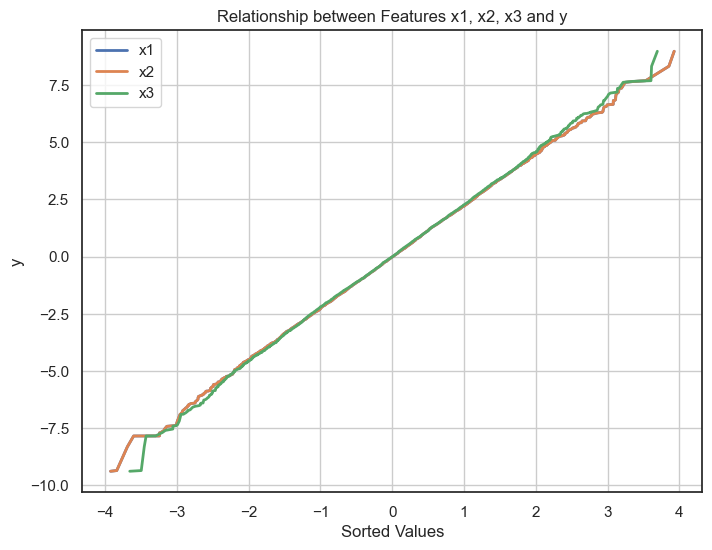

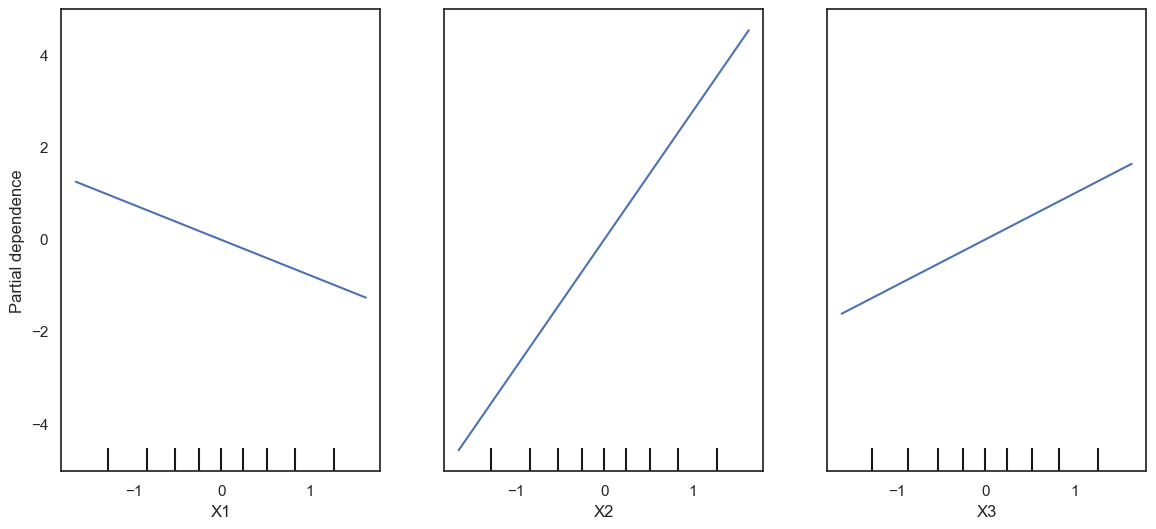

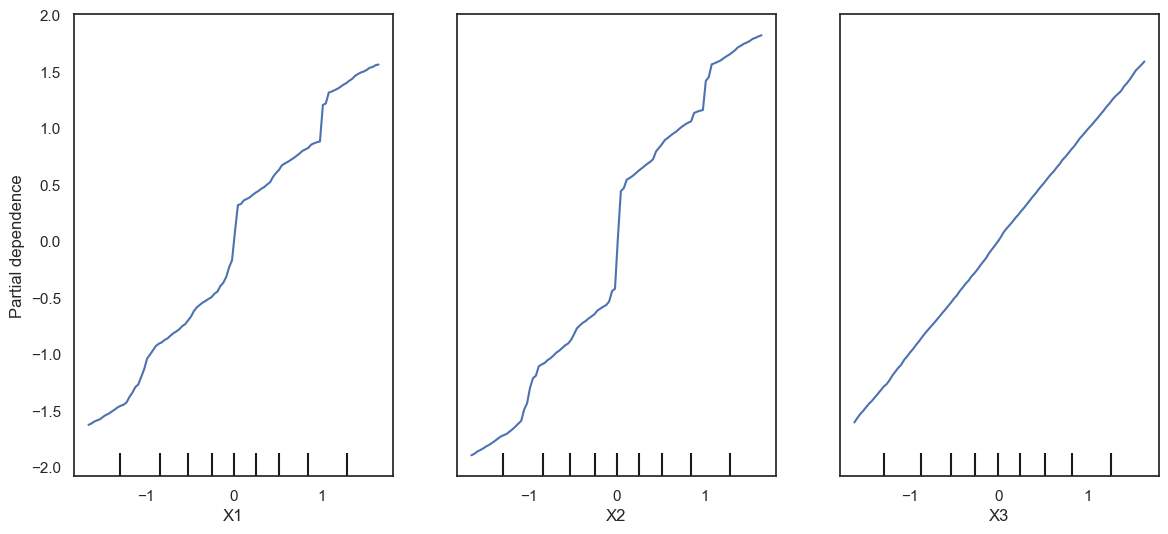

In [56]:
from sklearn.inspection import PartialDependenceDisplay
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
# Generating random variables x1, x2, x3 from a standard normal distribution
np.random.seed(42)  # Setting seed for reproducibility
num_samples = 10000  # Number of samples

x1 = np.random.normal(0, 1, num_samples)
x2 = np.random.normal(0, 1, num_samples)
x3 = np.random.normal(0, 1, num_samples)

# Calculating the correlation coefficients between x1, x2, x3
corr_x1_x2, _ = pearsonr(x1, x2)
corr_x1_x3, _ = pearsonr(x1, x3)
corr_x2_x3, _ = pearsonr(x2, x3)

y = x1 + x2 + x3
# Plotting the relationships using line plot
plt.figure(figsize=(8, 6))

plt.plot(sorted(x1), sorted(y), label='x1', linewidth=2)
plt.plot(sorted(x2), sorted(y), label='x2', linewidth=2)
plt.plot(sorted(x3), sorted(y), label='x3', linewidth=2)

plt.xlabel('Sorted Values')
plt.ylabel('y')
plt.title('Relationship between Features x1, x2, x3 and y')

plt.legend()
plt.grid(True)
plt.show()
X = np.vstack((x1, x2, x3)).T
# Creating and fitting a linear regression model
model = LinearRegression()
model.fit(X, y)

# Printing the coefficients and intercept learned by the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

print(f"Correlation coefficient between x1 and x2: {corr_x1_x2}")
print(f"Correlation coefficient between x1 and x3: {corr_x1_x3}")
print(f"Correlation coefficient between x2 and x3: {corr_x2_x3}")

feature_names = [2, 4]
plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 2, 1)  # (rows, columns, index)

disp1 = PartialDependenceDisplay.from_estimator(
    model, X, features=[0, 1, 2], feature_names=["X1", "X2", "X3"], ax=ax)

y = x1 + x1 + x3
X = np.vstack((x1, x1, x3)).T
model = LinearRegression()
model.fit(X, y)
rf_model = RandomForestRegressor()
rf_model.fit(X, y)
# Plotting the relationships using line plot
plt.figure(figsize=(8, 6))

plt.plot(sorted(x1), sorted(y), label='x1', linewidth=2)
plt.plot(sorted(x1), sorted(y), label='x2', linewidth=2)
plt.plot(sorted(x3), sorted(y), label='x3', linewidth=2)

plt.xlabel('Sorted Values')
plt.ylabel('y')
plt.title('Relationship between Features x1, x2, x3 and y')

plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)

disp1 = PartialDependenceDisplay.from_estimator(
    model, X, features=[0, 1, 2], feature_names=["X1", "X2", "X3"], ax=ax)

plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
disp1 = PartialDependenceDisplay.from_estimator(
    rf_model, X, features=[0, 1, 2], feature_names=["X1", "X2", "X3"], ax=ax)

Coefficients: [1. 1. 1.]
Intercept: -1.1102230246251565e-16
Correlation coefficient between x1 and x2: 0.8978941614914054
Correlation coefficient between x1 and x3: 0.03801508597252604
Correlation coefficient between x2 and x3: 0.053310821647595395


KeyboardInterrupt: 

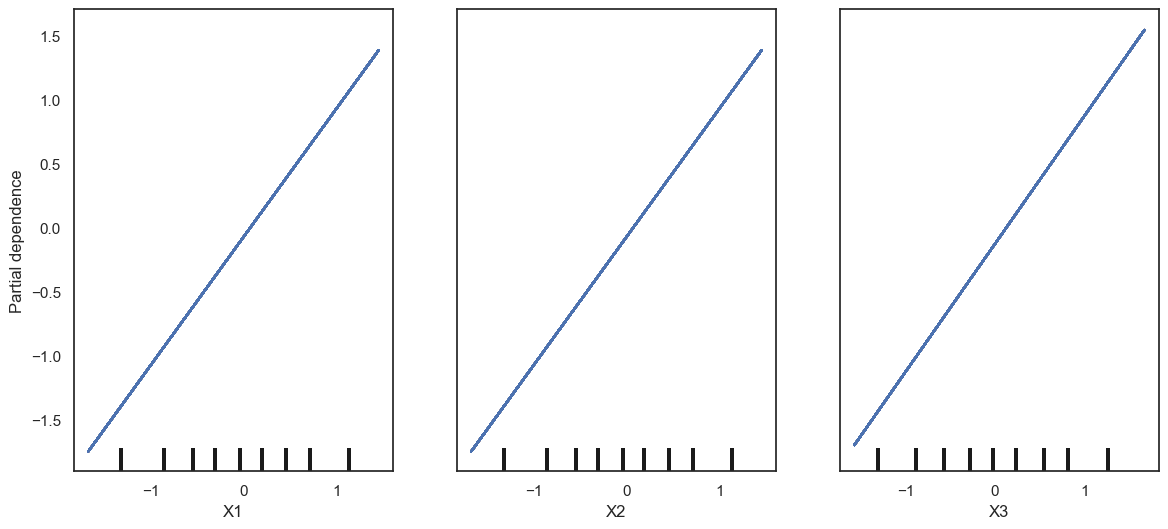

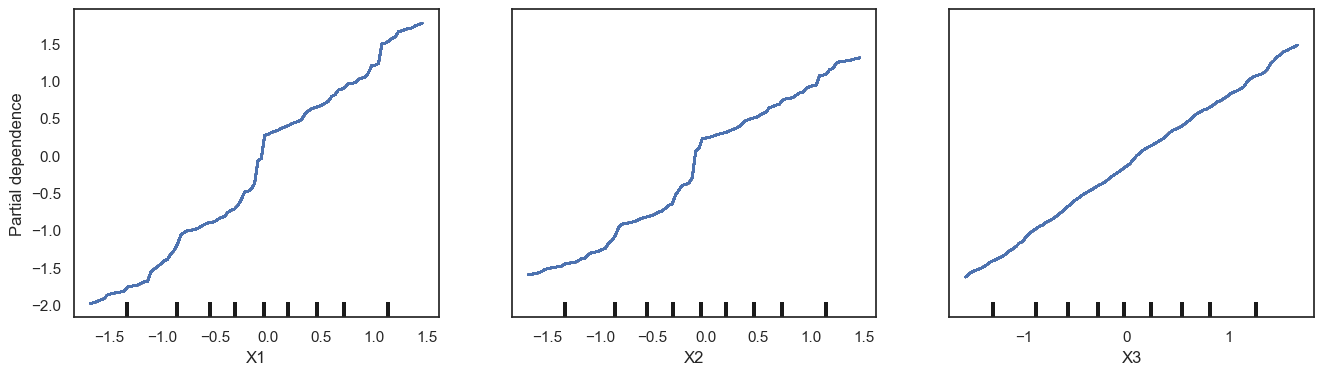

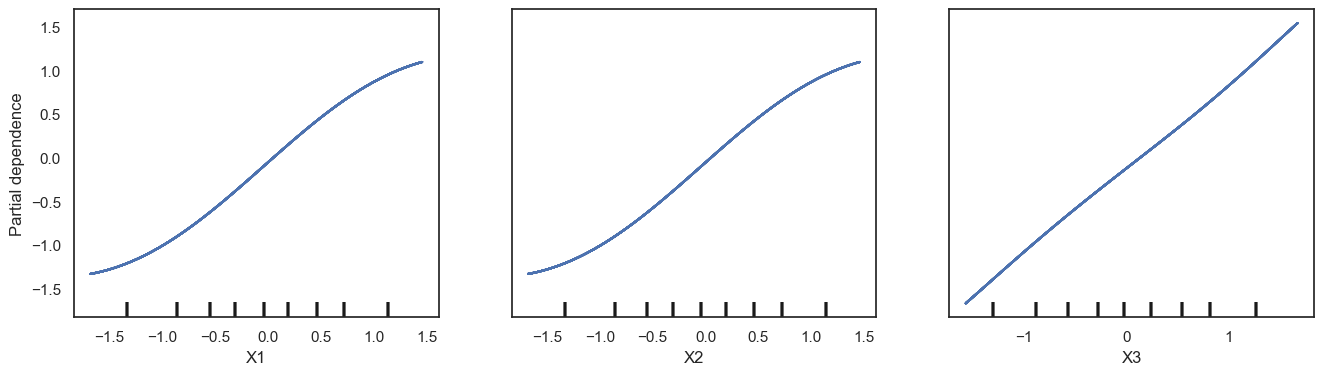

In [50]:
import numpy as np
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

np.random.seed(42)  # Setting seed for reproducibility
num_samples = 1000  # Number of samples

# Generating correlated variables x1, x2, x3
mean = [0, 0, 0]
cov = [
    [1, 0.9, 0],
    [0.9, 1, 0],
    [0, 0, 1]
]

data = np.random.multivariate_normal(mean, cov, size=num_samples)
x1, x2, x3 = data[:, 0], data[:, 1], data[:, 2]
y = x1 + x1 + x3
X = np.vstack((x1,x1,x3)).T

# Creating and fitting a linear regression model
model = LinearRegression()
model.fit(X, y)
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X, y)
# Creating and fitting the SVM model for regression
svm_regressor = svm.SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_regressor.fit(X, y)
# Printing the coefficients and intercept learned by the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Calculating the correlation coefficients
corr_x1_x2, _ = pearsonr(x1, x2)
corr_x1_x3, _ = pearsonr(x1, x3)
corr_x2_x3, _ = pearsonr(x2, x3)

print(f"Correlation coefficient between x1 and x2: {corr_x1_x2}")
print(f"Correlation coefficient between x1 and x3: {corr_x1_x3}")
print(f"Correlation coefficient between x2 and x3: {corr_x2_x3}")
from sklearn.inspection import PartialDependenceDisplay
feature_names = [2,4]
plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
num_iterations = 1
disp1 =PartialDependenceDisplay.from_estimator(model, X, features=[0,1,2],feature_names=["X1","X2","X3"], ax=ax)
for item in range(num_iterations):
    PartialDependenceDisplay.from_estimator(model, X, features=[0,1,2],feature_names=["X1","X2","X3"], ax=disp1.axes_)
    PartialDependenceDisplay.from_estimator(model, X, features=[0,1,2],feature_names=["X1","X2","X3"], ax=disp1.axes_)

plt.figure(figsize=(16,4))
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
disp1 =PartialDependenceDisplay.from_estimator(random_forest_model, X, features=[0,1,2],feature_names=["X1","X2","X3"], ax=ax)
for item in range(num_iterations):
    PartialDependenceDisplay.from_estimator(random_forest_model, X, features=[0,1,2],feature_names=["X1","X2","X3"], ax=disp1.axes_)
    PartialDependenceDisplay.from_estimator(random_forest_model, X, features=[0,1,2],feature_names=["X1","X2","X3"], ax=disp1.axes_)
plt.figure(figsize=(16,4))
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
disp1 =PartialDependenceDisplay.from_estimator(svm_regressor, X, features=[0,1,2],feature_names=["X1","X2","X3"], ax=ax)
for item in range(num_iterations):
    PartialDependenceDisplay.from_estimator(svm_regressor, X, features=[0,1,2],feature_names=["X1","X2","X3"], ax=disp1.axes_)
    PartialDependenceDisplay.from_estimator(svm_regressor, X, features=[0,1,2],feature_names=["X1","X2","X3"], ax=disp1.axes_)

KeyboardInterrupt: 

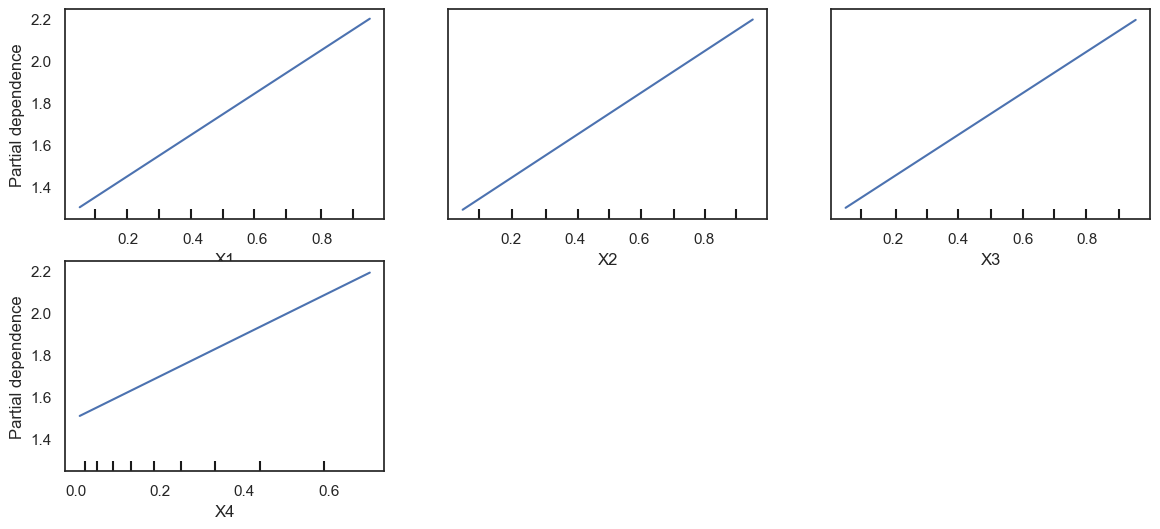

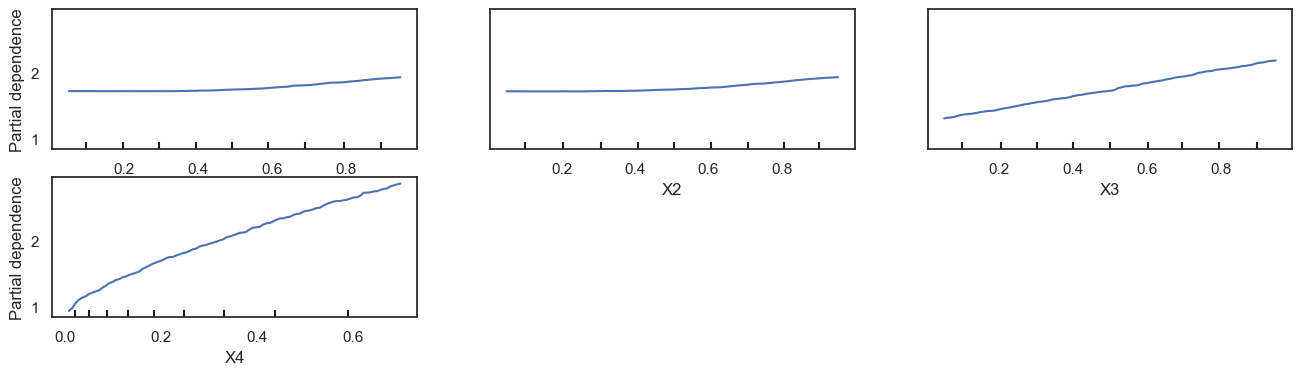

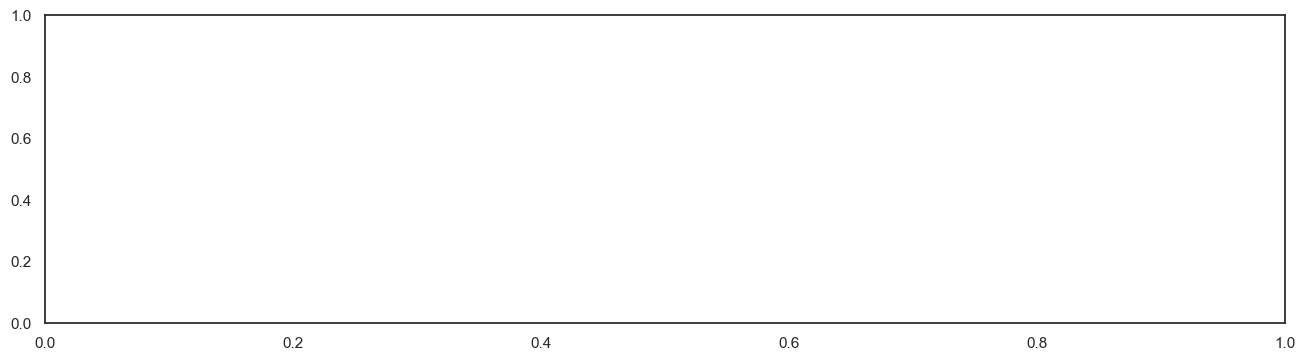

In [57]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Generating sample data
np.random.seed(42)
n_samples = 10000
x1 = np.random.rand(n_samples)
x2 = np.random.rand(n_samples)
x3 = np.random.rand(n_samples)
error = np.random.normal(0, 0.1, n_samples)  # Gaussian-distributed error

# Creating interaction term
x1_x2 = x1 * x2

# Generating target variable
y = x1 + x2 + x3 + x1_x2 + error

# Reshaping the variables for regression
X = np.column_stack((x1, x2, x3, x1_x2))

# Fitting the linear regression model
model = LinearRegression()
model.fit(X, y)

# Creating and fitting a linear regression model
model = LinearRegression()
model.fit(X, y)
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X, y)
# Creating and fitting the SVM model for regression
svm_regressor = svm.SVR(kernel='rbf')
svm_regressor.fit(X, y)

from sklearn.inspection import PartialDependenceDisplay
feature_names = [2,4]
plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
num_iterations = 50
disp1 =PartialDependenceDisplay.from_estimator(model, X, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"], ax=ax)


plt.figure(figsize=(16,4))
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
disp1 =PartialDependenceDisplay.from_estimator(random_forest_model, X, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"], ax=ax)

plt.figure(figsize=(16,4))
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
disp1 =PartialDependenceDisplay.from_estimator(svm_regressor, X, features=[0,1,2,3],feature_names=["X1","X2","X3","X4"], ax=ax)


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Simulating data
np.random.seed(42)
num_samples = 1000

# Generating three variables x1, x2, x3 with impact on y
x1 = np.random.normal(0, 1, num_samples)
x2 = np.random.normal(0, 1, num_samples)
x3 = np.random.normal(0, 1, num_samples)

# Generating y using all three variables
epsilon = np.random.normal(0, 0.1, num_samples)  # Error term
y = x1 + x2 + x3 + epsilon

# Selecting only x1 and x2 for training the model
X_train = np.vstack((x1, x2)).T

# Creating and fitting a linear regression model
model = LinearRegression()
model.fit(X_train, y)

# Printing the coefficients and intercept learned by the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [1.02017407 0.98412542]
Intercept: 0.004696782309984715


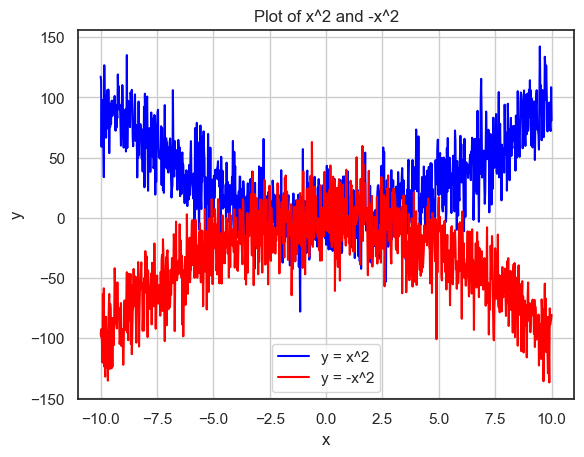

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Generate 1000 samples of x values
x = np.linspace(-10, 10, 1000)  # Range from -10 to 10 with 1000 samples

# Calculate y = x^2 and y = -x^2
y1 = x**2 + np.random.normal(0, 20, 1000) 
y2 = -x**2 + np.random.normal(0, 20, 1000) 

# Plot x^2 and -x^2
plt.plot(x, y1, label='y = x^2', color='blue')
plt.plot(x, y2, label='y = -x^2', color='red')
plt.title('Plot of x^2 and -x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
